In [1]:
#LIBS to be used 

from MDPlus.core import Fasu, Cofasu
from MDPlus.analysis import pca
import numpy as np
import os

import matplotlib.pyplot as plt
%matplotlib inline

#getting details automatically from files
import glob
import csv
import pandas as pd
import time
import datetime

#saving data 
import pickle

import mdtraj as md

from MDPlus import fastfitting

In [2]:
# functions for saving (pickling) and loading data 

def save_object(obj, filename, atm, folder):
    with open(atm+folder+filename, 'wb') as output:
        pickle.dump(obj, output, pickle.HIGHEST_PROTOCOL)
        
def load_object(filename, atm, folder):
    with open(atm+folder+filename, 'rb') as datainput:
        k = pickle.load(datainput)
        #pickle.load(obj, datainput, pickle.HIGHEST_PROTOCOL)
        print filename, " is now loaded"
        #print obj.shape
        return k;

dermsd_index_list.pkl  is now loaded
dermsd_values_list.pkl  is now loaded
dermsd_data_list.pkl  is now loaded
 
CA_1187409s_pdb1.pdb
The closest match to the target was snapshot 8115 with rmsd 0.64 angstroms
 
CA_1187409s_pdb2.pdb
The closest match to the target was snapshot 40364 with rmsd 0.56 angstroms
 
CA_1187409s_pdb3.pdb
The closest match to the target was snapshot 82735 with rmsd 0.88 angstroms
 
CA_1187409s_pdb4.pdb
The closest match to the target was snapshot 53123 with rmsd 0.50 angstroms
 
CA_1187409s_pdb5.pdb
The closest match to the target was snapshot 66225 with rmsd 0.00 angstroms
(103125, 58, 3)


/home/feb23/.local/lib/python2.7/site-packages/ipykernel_launcher.py:87: RuntimeWarning: divide by zero encountered in log
/home/feb23/.local/lib/python2.7/site-packages/ipykernel_launcher.py:99: RuntimeWarning: divide by zero encountered in log


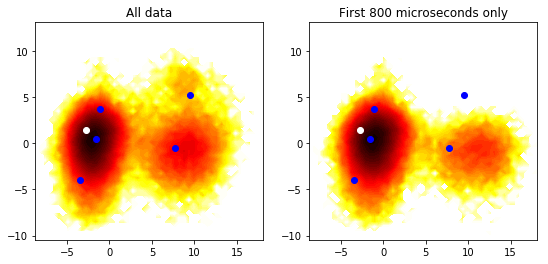

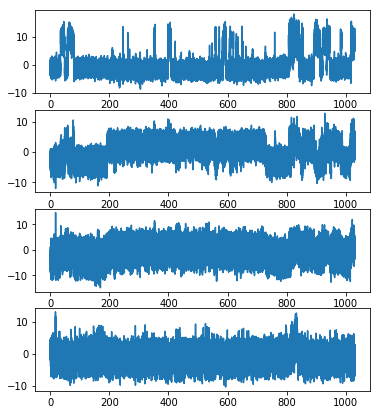

In [3]:
deshaw_pdb_workingdir = '/home/feb23/Documents/jha/extasy/bpti/protein_pdb'
de_string='/home/feb23/Documents/jha/extasy/bpti/extasy-bpti/Shaw_Data_Analysis/'

# note - takes 11 min to run on my laptop

do_de_rmsd=0
if do_de_rmsd==1:
    # calculated RMSD from c (de shaw traj) data with 5 pdb sturctures given by de shaw
    # this is good for testing and comparing values with our data 
    
    dermsd_index_list = []
    dermsd_values_list = []
    dermsd_data_list = []

    for i in range(1,6):
        pdb = 'CA_1187409s_pdb{}.pdb'.format(str(i))
        pdbload = deshaw_pdb_workingdir +'/'+pdb
        pdb_obj = md.load(pdbload, top)
        print type(pdb_obj)
        po_fasu = Fasu(pdb_obj)
        print type(po_fasu)
        po_cofasu = Cofasu(po_fasu)
        print type(po_cofasu)
        print po_cofasu.shape
        print c.shape
        target_structure = po_cofasu[0]
        dermsds = fastfitting.rmsd_traj(c, target_structure)
        print pdb
        print 'The closest match to the target was snapshot {} with rmsd {:4.2f} angstroms'.format(np.argmin(dermsds), dermsds.min())
        #dermsd_list.append(dermsds)
        dermsd_index_list.append(np.argmin(dermsds))
        dermsd_values_list.append(dermsds.min())
        dermsd_data_list.append(dermsds)

    # save results for loading later ( takes about 11 min to run on laptop)
    filename = 'dermsd_index_list.pkl'
    save_object(dermsd_index_list,filename,de_string,'')

    filename = 'dermsd_values_list.pkl'
    save_object(dermsd_values_list,filename,de_string,'')

    filename = 'dermsd_data_list.pkl'
    save_object(dermsd_data_list,filename,de_string,'')

else:
    
    # load results for use in other places later on 
    filename = 'dermsd_index_list.pkl'
    dermsd_index_list = load_object(filename,de_string,'')

    filename = 'dermsd_values_list.pkl'
    dermsd_values_list = load_object(filename,de_string,'')

    filename = 'dermsd_data_list.pkl'
    dermsd_data_list = load_object(filename,de_string,'') 
    
    
    for i in range(1,6):
        pdb = 'CA_1187409s_pdb{}.pdb'.format(str(i))
        print " "
        print pdb
        print 'The closest match to the target was snapshot {} with rmsd {:4.2f} angstroms'.format(dermsd_index_list[i-1], dermsd_values_list[i-1])
                      


            
            
            
# DE SHAW DATA

f = Fasu('../bpti/extasy-bpti/Shaw_Data_Analysis/bpti_ca_1ms_dt10ns.xtc',
         top='../bpti/extasy-bpti/Shaw_Data_Analysis/bpti_ca.pdb')#,selection='name CA') #note that analysis fails when use selection='name CA'
c = Cofasu(f)

print c.shape # This should give 103125 snapshots, each of 58 atoms, each with three (x,y,z) coordinates
p = pca.fromtrajectory(c)

DE_plot = 1

if DE_plot == 1:
# The rare event can be seen at about 820 microseconds in PC4. A 2-D plot in the PC1/PC4 space works well, 
# see the spot at (-10, 7):
    plt.figure(figsize=(9, 4))
    plt.subplot(1,2,1)
    z,x,y = np.histogram2d(1.0*p.projs[0],p.projs[3], bins=50)
    DEshaw = [x,y,z]
    F = -np.log(z)
    extent = [x[0], x[-1], y[0], y[-1]]
    plt.title('All data')
    plt.contourf(F.T, 50, cmap=plt.cm.hot, extent=extent)

    # plot the 5 most visited/ stable states DE Shaw found from their sim
    plt.plot(p.projs[0][11155],p.projs[3][11155], 'wo') # starting structure
    plt.plot(p.projs[0][dermsd_index_list[:]],p.projs[3][dermsd_index_list[:]], 'bo')
 
    
    plt.subplot(1,2,2)
    z,x,y = np.histogram2d(p.projs[0][:80000],p.projs[3][:80000], bins=50)
    F = -np.log(z)
    plt.title('First 800 microseconds only')
    plt.contourf(F.T, 50, cmap=plt.cm.hot, extent=extent)
    # note sure why these plots come out flipped right to left compared to plots prof Laughton supplied 
    
    # plot the 5 most visited/ stable states DE Shaw found from their sim
    plt.plot(p.projs[0][11155],p.projs[3][11155], 'wo') # starting structure
    plt.plot(p.projs[0][dermsd_index_list[:]],p.projs[3][dermsd_index_list[:]], 'bo')

    
    # In this cell we plot the time series for the trajectory projected along each of the 1st four PCs
    plt.figure(figsize=(6, 7))
    time = np.arange(len(c)) / 100.0
    plt.subplot(4,1,1)
    plt.plot(time, p.projs[0])
    plt.subplot(4,1,2)
    plt.plot(time, p.projs[1])
    plt.subplot(4,1,3)
    plt.plot(time, p.projs[2])
    plt.subplot(4,1,4)
    plt.plot(time, p.projs[3])

In [4]:
def set_up_vars(atm,folder):
    #path_to_zip = glob.glob(atm+folder+'zip.rp*-pilot.0000')
    path_to_zip = glob.glob(atm+folder+'rp*-pilot.0000')

    rpname="cow"
    zipfolder="cow"
    path=1
    pathSt="cow"
    pathCu ="cow"
    iters=1
    path_to_cu=1
    prj = 1
    if path_to_zip!=[]:
        rpname = str(path_to_zip[0].split("/")[-1].split("-pilot.0000")[0])
        zipfolder = rpname+ '-pilot.0000/'
        prj = folder + zipfolder
        path   = atm+prj
        pathSt = atm+prj+"staging"
        pathCu = atm+prj+"cu009"
        path_to_cu = glob.glob(atm+folder+zipfolder+"cu009/"+"min-*_9.log")
        iters = int(len(path_to_cu))+2-1 #need the -1 bec it failed before completion so counter is off
    return path_to_zip, rpname, zipfolder, path, pathSt, pathCu, iters, path_to_cu, prj; 


#########################################

def count_files(atm,folder,zipfolder):
    #print " "
    #print "path to cu"
    path_to_cu = glob.glob(atm+folder+zipfolder+"/cu009/"+"min-*_9.log")
    #print path_to_cu
    #print len(path_to_cu)
    num_minlog = int(len(path_to_cu)) #need the -1 bec it failed before completion so counter is off
    #print "min log = ", num_minlog
    path_to_cu = glob.glob(atm+folder+zipfolder+"/cu009/"+"eq-*_9.log")
    num_eqlog = int(len(path_to_cu))
    #print "eq log =", num_eqlog
    path_to_cu = glob.glob(atm+folder+zipfolder+"/staging/"+"md-*_1.xtc")
    num_xtc = int(len(path_to_cu))
    #print "num_xtc = ", num_xtc
    path_to_cu = glob.glob(atm+folder+zipfolder+"/staging/"+"min-*_1.gro")
    num_min_gro = int(len(path_to_cu))
    #print "min_gro files =", num_min_gro
    path_to_cu = glob.glob(atm+folder+zipfolder+"/staging/"+"eq-*_1.gro")
    num_eq_gro = int(len(path_to_cu))
    #print "num_eq gro = ", num_eq_gro
    path_to_cu = glob.glob(atm+folder+zipfolder+"/staging/"+"coco_out*_1.gro")
    num_coco_gro = int(len(path_to_cu))
    #print "num_coco gro = ", num_coco_gro
    return num_minlog, num_eqlog, num_xtc, num_min_gro, num_eq_gro, num_coco_gro;

def count_files(atm,folder,zipfolder,):
    #print " "
    #print "path to cu"
    path_to_cu = glob.glob(atm+folder+zipfolder+"/cu009/"+"min-*_9.log")
    #print path_to_cu
    #print len(path_to_cu)
    num_minlog = int(len(path_to_cu)) #need the -1 bec it failed before completion so counter is off
    #print "min log = ", num_minlog
    path_to_cu = glob.glob(atm+folder+zipfolder+"/cu009/"+"eq-*_9.log")
    num_eqlog = int(len(path_to_cu))
    #print "eq log =", num_eqlog
    #path_to_cu = glob.glob(atm+folder+zipfolder+"/staging/"+"md-*_1.xtc")
    path_to_cu = glob.glob(atm+folder+zipfolder+"zip.*/"+"staging/"+"md-*_1.xtc")
    #atm+folder+zipfolder+"zip.*/"+"staging/"+fileprefix+"*"
    num_xtc = int(len(path_to_cu))
    #print "num_xtc = ", num_xtc
    path_to_cu = glob.glob(atm+folder+zipfolder+"/staging/"+"min-*_1.gro")
    num_min_gro = int(len(path_to_cu))
    #print "min_gro files =", num_min_gro
    path_to_cu = glob.glob(atm+folder+zipfolder+"/staging/"+"eq-*_1.gro")
    num_eq_gro = int(len(path_to_cu))
    #print "num_eq gro = ", num_eq_gro
    path_to_cu = glob.glob(atm+folder+zipfolder+"/staging/"+"coco_out*_1.gro")
    num_coco_gro = int(len(path_to_cu))
    #print "num_coco gro = ", num_coco_gro
    return num_minlog, num_eqlog, num_xtc, num_min_gro, num_eq_gro, num_coco_gro;

In [5]:
def which_top(atm,folder):
    #print " "
    #print "path to cu"
    path_to_cu = glob.glob(atm+folder+"inp_files/*.gro")
    #print path_to_cu
    cow=path_to_cu[0].split("/")
    top=cow[-1]
    #print top
    top=str(path_to_cu[0])
    #print top
    return top;

###################################################3
def get_gmxcoco_data(atm,folder):
    #print  "#              gmxcoco.wcfg details        #"
    wsplit = []
    path_to_gmxcoco=atm+folder+"/gmxcoco.wcfg"    
    e=open(path_to_gmxcoco,"r")
    #print e.readlines()
    w = e.readlines()
    e.close()
    gmxcocolines = [5, 7, 12, 28, 31  ]
    for i in range(len(gmxcocolines)):
        #print w[gmxcocolines[i]]
        #print w[gmxcocolines[i]].split()
        wsplit.append(w[gmxcocolines[i]].split())
    cu = int(wsplit[1][2])
    return cu, path_to_gmxcoco ; 

In [6]:
def run_fasu_tot(l,path,top,cu,iters,fileprefix,fileExt,offset=0):
    offset=0
    for i in range(0,iters):
        for k in range(cu):                
            string = path+"/"+fileprefix+"-"+str(i)+"_"+str(k)+fileExt
            ss = path+"/"
            if(fileprefix=="coco_out"):
                string = path+"/"+fileprefix+"_"+str(i)+"_"+str(k)+fileExt
            #str_list[i][k] = string
            #print string
            if(os.path.isfile(string)==True):
                #print string
                l[i][k] = Fasu(string,top=top, selection='name CA')
                #print l[i][k]
    #print l[-1][:]
    #print "END RUN FASU TOT"
    return l;

def plot_proj_on_deshaw(p,cow,prj,fileprefix,fileExt,dermsd_index_list, cap, rmsd_index_list=0, offset=0):
    title=prj+" all                "+fileprefix+"*"+fileExt
    pByIters = []
    p14 = []
    for i in range(len(cow)):
        p14.append(p.map(cow[i])[[0,3]])
    p14 = np.array(p14).T



In [7]:

def do_fasu(atm, folder, zipfolder, top, fileprefix):
    l_fas = []
    #path_to_file = glob.glob(atm+folder+zipfolder+"staging/"+fileprefix+"*")
    path_to_file = glob.glob(atm+folder+zipfolder+"zip.*/"+"staging/"+fileprefix+"*")

    for i in range(len(path_to_file)):
        cow = Fasu(path_to_file[i],top=top,selection='name CA')
        l_fas.append(cow)
    c_out = Cofasu(l_fas)
    return c_out;
###################################################

In [8]:
def check_n_load(fileExt,fileprefix,dirname,atm,rpname,zipfolder,top):   # check if need to DoCoFasu
    #fileExt = '.gro'
    #fileprefix = 'coco_out'
    coco_c="na"
    
    #print " check for DoCoFasu"
    #print " "
    filename = dirname+"_"+fileprefix+".pkl"
    checkForCoFasu = glob.glob(atm+folder+filename)
    #print checkForCoFasu
    if checkForCoFasu==[]:
        doCoFasu01=1
    elif rpname=="cow":
        doCoFasu01=2
    else:
        doCoFasu01 = 0
        #print filename, " exists"
        
        
    #print "1 - doCoFasu01 = ", doCoFasu01
    if rpname=="cow":
        #print "no zip files!"
        #print "no zip files!"
        doCoFasu01=2
    if path_to_zip==[]:
        #print "no zip files!"
        doCoFasu01=2
    
    #print " pathj to zip"
    #print "path_to_zip"
    #print path_to_zip
    #######################################################
    #print "2 - doCoFasu01 = ", doCoFasu01
    
    if doCoFasu01==1:
        #print "doing CoFasu01 Stuffs  this will take a while "
        coco_c = do_fasu(atm, folder, zipfolder, top, fileprefix)
        filename = dirname+"_"+fileprefix+".pkl"
        save_object(coco_c,filename,atm,folder)
        #print "saved new ", filename
    elif doCoFasu01==2:
        print " "
        #print " there is no zip here!"
        #print "skipping this dir"
    else:
        filename = dirname+"_"+fileprefix+".pkl"
        coco_c = load_object(filename,atm,folder)
    
    return coco_c;
    
    #if doCoFasu!=2:
        #del md_c

In [9]:
def plot_proj_on_deshaw(p,cow,folder,fileprefix,fileExt,it):
    title=folder+" "+fileprefix+"*"+fileExt+"   iters="+str(it)
    cap=title
    p14 = []
    for i in range(len(cow)):
        p14.append(p.map(cow[i])[[0,3]])
    p14 = np.array(p14).T
    
    #print p14.shape
    #print p14
    fig = plt.figure(figsize=(9,4))
    plt.xlim((-15, 20))
    plt.ylim((-11, 15))
    plt.title(title)
    fig.text(-0.1,-0.2,cap)
    plt.plot(p.projs[0],p.projs[3], 'k.')
    
    #z,x,y = np.histogram2d(1.0*p.projs[0],p.projs[3], bins=50)
    #DEshaw = [x,y,z]
    #F = -np.log(z)
    #extent = [x[0], x[-1], y[0], y[-1]]
    #plt.title('All data')
    #plt.contourf(F.T, 50, cmap=plt.cm.hot, extent=extent)
    # plot the 5 most visited/ stable states DE Shaw found from their sim
    #plt.plot(p.projs[0][11155],p.projs[3][11155], 'wo') # starting structure
    plt.plot(p14[0][:],p14[1][:], 'bo') # starting structure

    #plt.plot(p.projs[0][dermsd_index_list[:]],p.projs[3][dermsd_index_list[:]], 'bo')
    plt.show()
    return;

 
p12b02_left_d4_itrs48_k12_1000_k34_1000
 ###################################################
p12b02_left_d4_itrs48_k12_1000_k34_1000_md.pkl  is now loaded


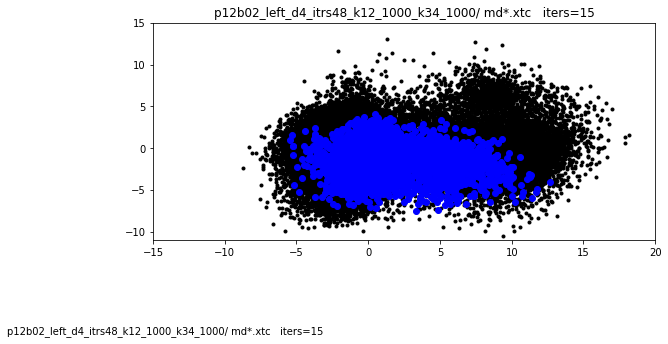

In [10]:
#dirlist = ["test_p07e01_k12_00100_k34_01000_itx2"]
atm = '/home/feb23/Documents/jha/extasy/bpti/atm_sync_02_from_atm/'

dirlist = glob.glob(atm+"p12b02_left_d4_itrs48_k12_1000_k34_1000*")

#print dirlist

for i in range(len(dirlist)):
    dirname=dirlist[i].split("/")
    dirname=dirname[-1]
    print " "
    print dirname
    #print dirlist[i]
    #print " "
    doCoFasu = 0
    doRmsd=0
    folder = dirname+"/"
    #print folder
    reqe =6
    print " ###################################################"
    #print atm+folder+'rp*-pilot.0000'
    path_to_zip = glob.glob(atm+folder+'rp*-pilot.0000')
    #print path_to_zip
    path_to_zip, rpname, zipfolder,path,pathSt, pathCu, iters, path_to_cu, prj = set_up_vars(atm,folder)

    num_minlog, num_eqlog, num_xtc, num_min_gro, num_eq_gro, num_coco_gro = count_files(atm,folder,zipfolder)

    top = which_top(atm,folder)
    
    cu, path_to_gmxcoco = get_gmxcoco_data(atm, folder)

     # check if need to DoCoFasu
    fileExt = '.xtc'
    fileprefix = 'md'
    md_c = check_n_load(fileExt,fileprefix,dirname,atm,rpname,zipfolder,top)
    
    if md_c !="na":
        plot_proj_on_deshaw(p,md_c,folder,fileprefix,fileExt,num_xtc)
        #plt.show()
    
    #fileExt = '.gro'
    #fileprefix = 'coco_out'
    #coco_c = check_n_load(fileExt,fileprefix,dirname,atm,rpname,zipfolder,top)
    
    #if coco_c !="na":
    #    plot_proj_on_deshaw(p,coco_c,folder,fileprefix,fileExt,num_xtc)
        #plt.show()
    
    #fileExt = '.gro'
    #fileprefix = 'eq'
    #eq_c = check_n_load(fileExt,fileprefix,dirname,atm,rpname,zipfolder,top)
    
    #if eq_c !="na":
    #    plot_proj_on_deshaw(p,eq_c,folder,fileprefix,fileExt,num_xtc)
        #plt.show()
        
    #fileExt = '.gro'
    #fileprefix = 'min'
    #min_c = check_n_load(fileExt,fileprefix,dirname,atm,rpname,zipfolder,top)
    
    #if min_c !="na":
    #    plot_proj_on_deshaw(p,min_c,folder,fileprefix,fileExt,num_xtc)
        #plt.show()

In [11]:
# Load DEShaw PDB files:
deshaw_pdb_workingdir = '/home/feb23/Documents/jha/extasy/bpti/protein_pdb'
de_string='/home/feb23/Documents/jha/extasy/bpti/extasy-bpti/Shaw_Data_Analysis/'


pdbfilenames = [deshaw_pdb_workingdir+'/CA_1187409s_pdb{}.pdb'.format(i+1) for i in range(5)]
pdbtraj = md.load(pdbfilenames)

# Load DEShaw millisecond data:
shawtraj = md.load(de_string+'bpti_ca_1ms_dt10ns.xtc', top=de_string+'bpti_ca.pdb')

# Find the snapshot in shawtraj which is closest to each of the snapshots in pdbtraj
for i in range(5):
    rmsds = md.rmsd(shawtraj, pdbtraj[i])
    print i, np.argmin(rmsds), rmsds.min()

0 8115 0.0641206
1 40364 0.0563344
2 82735 0.0882931
3 53123 0.0497713
4 66225 0.000512916


In [19]:
# Now the CoCo-MD data. This method of loading the data saves memory: each trajectory 
# is loaded independently, and stripped down to just C_alpha atoms, before moving on to the next. 
# Finally we join them all together:
n_iters = 37
n_reps = 20

xtcfilenamebase = 'p07e01_k12_00100_k34_01000_itx2_md_xtc_data/md-{}_{}.xtc'
topfile = '../gmxcoco-bpti/inp_files/bpti.gro'
sel = md.load(top).topology.select('name CA')
xtctrajs = []

xtctraj_list = glob.glob(atm+"p12b02_left_d4_itrs48_k12_1000_k34_1000/rp.sess*/zip.rp.sess*/staging/md-*.xtc")
#print xtctraj_list

for iter in range(len(xtctraj_list)):
        t = md.load(xtctraj_list[i], top=top)
        t.topology = t.topology.subset(sel)
        t.xyz = t.xyz[:, sel]
        xtctrajs.append(t)
xtctraj = xtctrajs[0].join(xtctrajs[1:])

In [20]:
bakxtctraj=xtctraj
xtctraj=shawtraj

/home/feb23/.local/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


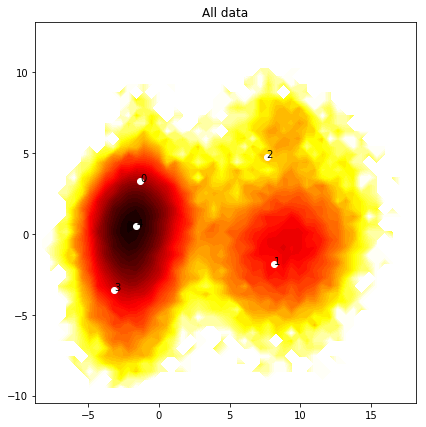

In [21]:
plt.figure(figsize=(15,7))
plt.subplot(121)
z,x,y = np.histogram2d(p.projs[0],p.projs[3], bins=50)
F = -np.log(z)
extent = [x[0], x[-1], y[0], y[-1]]
plt.title('All data')
plt.contourf(F.T, 50, cmap=plt.cm.hot, extent=extent)
for i in range(5):
    x = pdbtraj.xyz[i] * 10.0 # convert from nanometres to angstroms
    proj = p.map(x)
    plt.plot(proj[0], proj[3], 'wo')
    plt.text( proj[0], proj[3], '{}'.format(i))



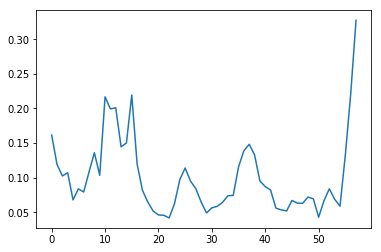

In [22]:
xtctraj.superpose(xtctraj[0])
mean_structure = xtctraj.xyz.mean(axis=0)
diff = xtctraj.xyz - mean_structure
rmsf = np.sqrt((diff * diff).sum(axis=2).mean(axis=0))
plt.plot(rmsf)  

In [23]:
print len(xtctraj[0].xyz)
print xtctraj.superpose(xtctraj[0])
print len(pdbtraj[0].xyz)
print pdbtraj.superpose(pdbtraj[0])

1
<mdtraj.Trajectory with 103125 frames, 58 atoms, 58 residues, without unitcells>
1
<mdtraj.Trajectory with 5 frames, 58 atoms, 58 residues, and unitcells>


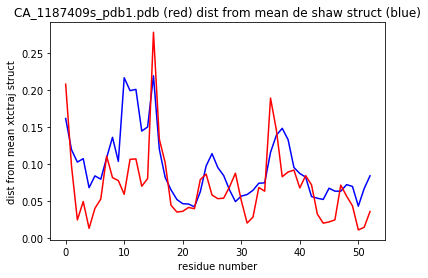

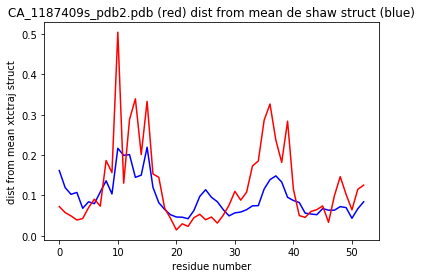

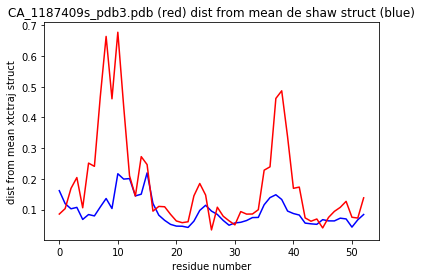

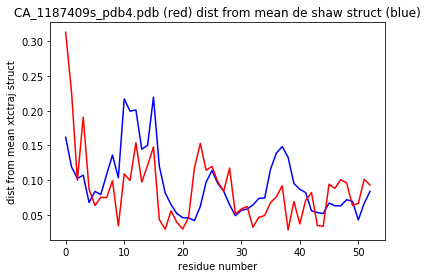

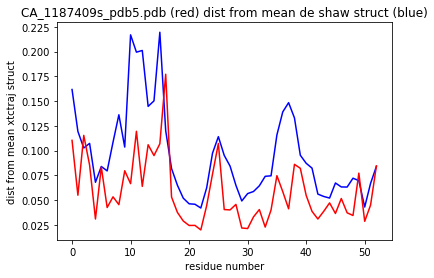

In [24]:
# look at different shaw conformations vs starting conform 

def rmsf_fig(traj,base_traj,name):
    base_traj.superpose(base_traj[0])
    mean_structure = base_traj.xyz.mean(axis=0)
    diff = base_traj.xyz - mean_structure
    base_rmsf = np.sqrt((diff * diff).sum(axis=2).mean(axis=0))
    
    plt.plot(base_rmsf[0:53], 'b', label="xtctraj")  
    
    traj.superpose(base_traj[0])
    
    diff = traj.xyz - mean_structure
    rmsf = np.sqrt((diff * diff).sum(axis=2).mean(axis=0))

    cow=name.split("/")
    plt.plot( rmsf[0:53], 'r' ,label=cow)
    #plt.plot(base_rmsf[0:53], label="xtctraj", rmsf[0:53],label=cow)  
    #plt.plot([base_rmsf[0:53], rmsf[0:53]])
    #plt.plot(base_rmsf[0:53][0],base_rmsf[0:53][1], "--r")

    plt.title(cow[-1]+" (red)"+" dist from mean de shaw struct (blue)")
    plt.xlabel('residue number')
    plt.ylabel('dist from mean xtctraj struct')
    plt.show()
    
    return ;

rmsf_fig(pdbtraj[0],xtctraj,pdbfilenames[0])
rmsf_fig(pdbtraj[1],xtctraj,pdbfilenames[1])
rmsf_fig(pdbtraj[2],xtctraj,pdbfilenames[2])
rmsf_fig(pdbtraj[3],xtctraj,pdbfilenames[3])
rmsf_fig(pdbtraj[4],xtctraj,pdbfilenames[4])


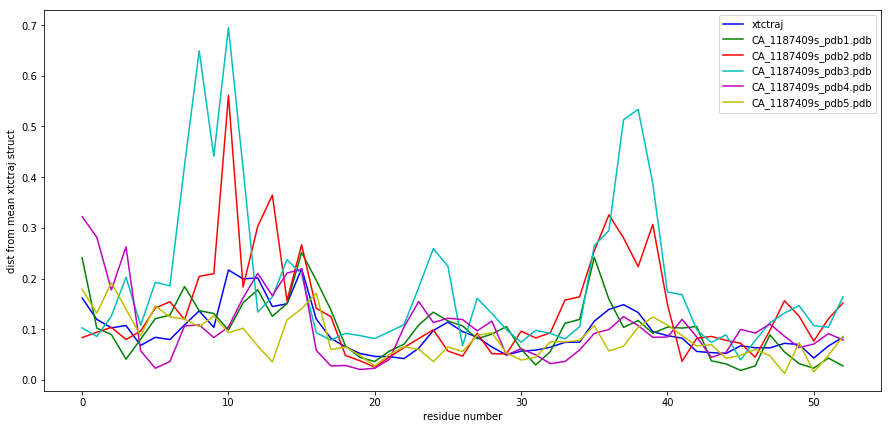

In [25]:
# look at 5 conformations on top of each other with same xtctraj[0] superpose base

cl = ["g", "r", "c", "m", "y"]
def rmsf_fig3(traj,base_traj,name,cl,res_start,res_end,structure):
    base_traj.superpose(base_traj[0])
    mean_structure = base_traj.xyz.mean(axis=0)
    diff = base_traj.xyz - mean_structure
    base_rmsf = np.sqrt((diff * diff).sum(axis=2).mean(axis=0))
    
    plt.figure(figsize=(15,7))
    
    
    plt.plot(base_rmsf[res_start:res_end], 'b', label="xtctraj")  
    
    #for i in range(len(traj)):
    for i in structure:
        traj[i].superpose(base_traj[0])
    
        diff = traj[i].xyz - mean_structure
        rmsf = np.sqrt((diff * diff).sum(axis=2).mean(axis=0))
    
        cow=name[i].split("/")
        plt.plot( rmsf[res_start:res_end], cl[i] ,label=cow[-1])
    #plt.plot(base_rmsf[0:53], label="xtctraj", rmsf[0:53],label=cow)  
    #plt.plot([base_rmsf[0:53], rmsf[0:53]])
    #plt.plot(base_rmsf[0:53][0],base_rmsf[0:53][1], "--r")

    #plt.title(cow[-1]+" (red)"+" dist from mean de shaw struct (blue)")
    plt.xlabel('residue number')
    plt.ylabel('dist from mean xtctraj struct')
    plt.legend()
    #plt.show()
    
    return ;

rmsf_fig3(pdbtraj,xtctraj,pdbfilenames,cl,0,53,range(len(pdbtraj)) )
#rmsf_fig3(pdbtraj,xtctraj,pdbfilenames,cl)
#rmsf_fig3(pdbtraj,xtctraj,pdbfilenames,cl)
#rmsf_fig3(pdbtraj,xtctraj,pdbfilenames,cl)
#rmsf_fig3(pdbtraj,xtctraj,pdbfilenames,cl)

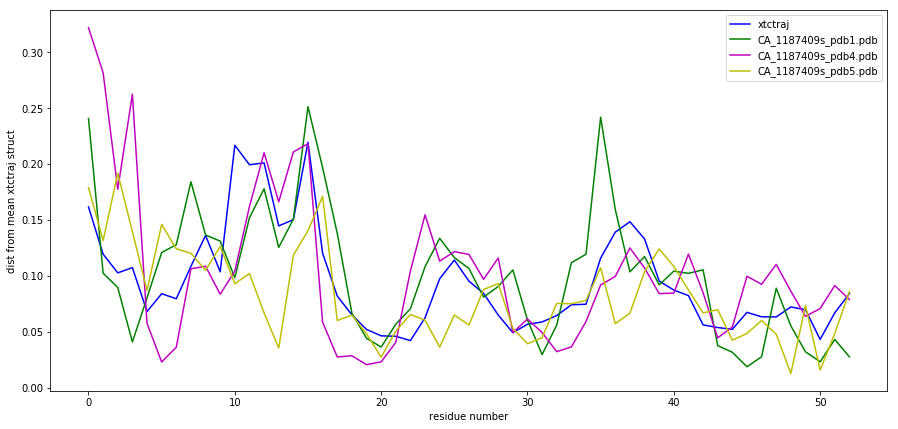

In [26]:
# just 1 4 and 5 becuase have similar peak around res 15 and are on much smaller scale
# than 2 and 3 
rmsf_fig3(pdbtraj,xtctraj,pdbfilenames,cl,0,53,[0,3,4] )


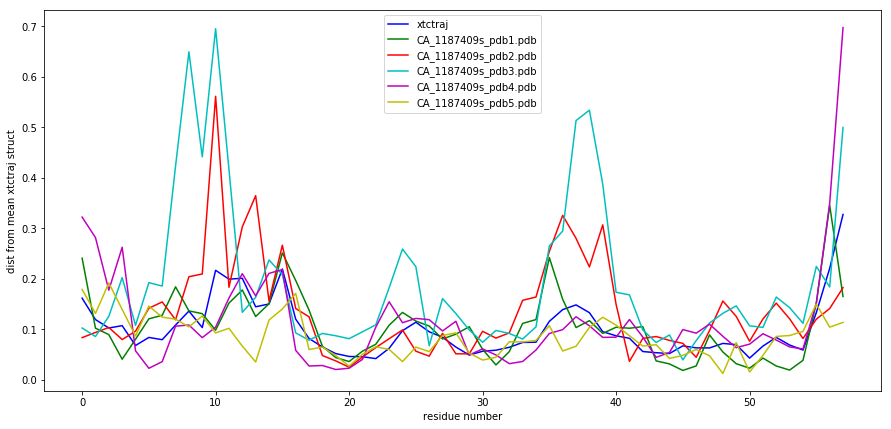

In [28]:
rmsf_fig3(pdbtraj,xtctraj,pdbfilenames,cl,0,58,range(len(pdbtraj)) )


Below this we will be comparing the found conformations which each other. Particularly 
we check for the main differences in residue distances between conformations that are on opposite lobes of the shaw data.

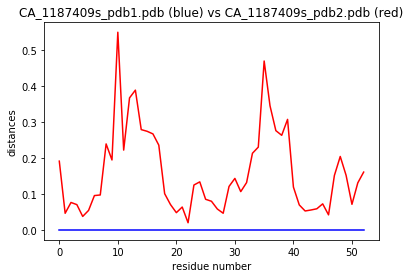

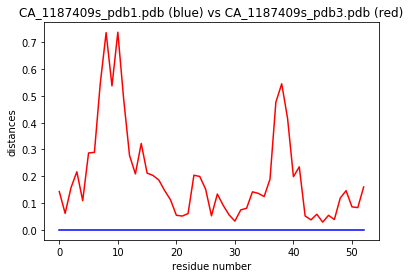

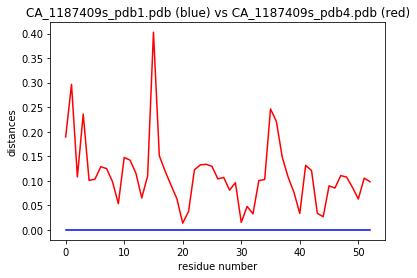

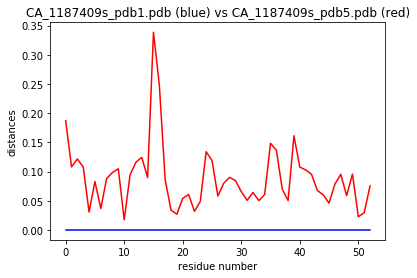

In [30]:
def rmsf_fig1(traj,base_traj,name,name2):
    base_traj.superpose(base_traj[0])
    mean_structure = base_traj.xyz.mean(axis=0)
    diff = base_traj.xyz - mean_structure
    base_rmsf = np.sqrt((diff * diff).sum(axis=2).mean(axis=0))
    
    end=53

    
    cow2=name2.split("/")
    
    plt.plot(base_rmsf[0:end], 'b', label=cow2)  
    
    traj.superpose(base_traj[0])
    
    diff = traj.xyz - mean_structure
    rmsf = np.sqrt((diff * diff).sum(axis=2).mean(axis=0))

    cow=name.split("/")
    plt.plot( rmsf[0:end], 'r' ,label=cow)
    #plt.plot(base_rmsf[0:53], label="xtctraj", rmsf[0:53],label=cow)  
    #plt.plot([base_rmsf[0:53], rmsf[0:53]])
    #plt.plot(base_rmsf[0:53][0],base_rmsf[0:53][1], "--r")

    plt.title(cow[-1]+" (blue) vs "+cow2[-1]+" (red)")
    plt.xlabel('residue number')
    plt.ylabel('distances')
    plt.show()
    
    return ;

subj=0
base=1
rmsf_fig1(pdbtraj[subj],pdbtraj[base],pdbfilenames[subj],pdbfilenames[base])

subj=0
base=2
rmsf_fig1(pdbtraj[subj],pdbtraj[base],pdbfilenames[subj],pdbfilenames[base])

subj=0
base=3
rmsf_fig1(pdbtraj[subj],pdbtraj[base],pdbfilenames[subj],pdbfilenames[base])

subj=0
base=4
rmsf_fig1(pdbtraj[subj],pdbtraj[base],pdbfilenames[subj],pdbfilenames[base])

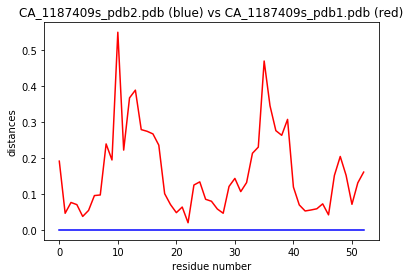

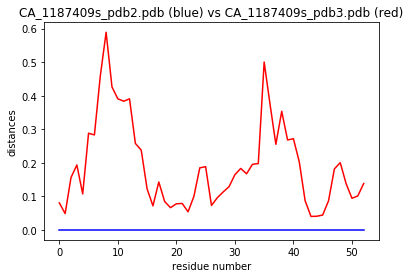

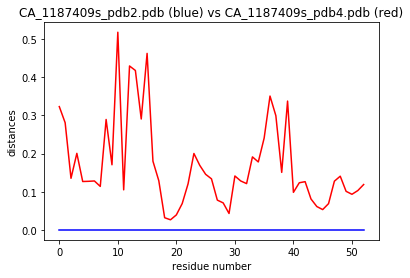

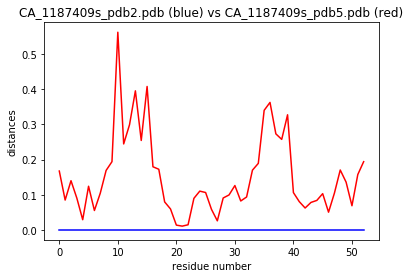

In [31]:
subj=1
base=0
rmsf_fig1(pdbtraj[subj],pdbtraj[base],pdbfilenames[subj],pdbfilenames[base])

subj=1
base=2
rmsf_fig1(pdbtraj[subj],pdbtraj[base],pdbfilenames[subj],pdbfilenames[base])

subj=1
base=3
rmsf_fig1(pdbtraj[subj],pdbtraj[base],pdbfilenames[subj],pdbfilenames[base])

subj=1
base=4
rmsf_fig1(pdbtraj[subj],pdbtraj[base],pdbfilenames[subj],pdbfilenames[base])

Below this point wanted to see if we could start to generate average strucutres for each lobe and/or of the rare conformation state to again see if there are any hints that can 
come from it that point towards what we may need to do to reach those new conformations spaces. 

In [34]:
print int(len(p.projs[0])/6)


17187


/home/feb23/.local/lib/python2.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


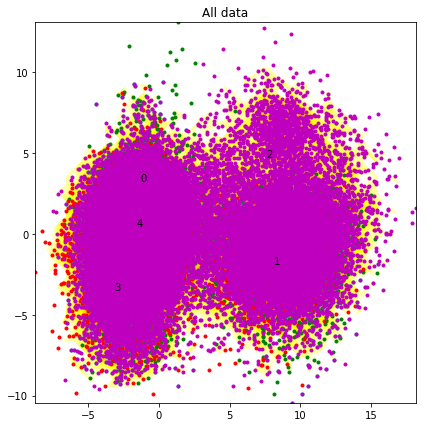

In [35]:
cl = [".g", ".r", ".c", ".m", ".y"]

plt.figure(figsize=(15,7))
plt.subplot(121)
z,x,y = np.histogram2d(p.projs[0],p.projs[3], bins=50)
F = -np.log(z)
extent = [x[0], x[-1], y[0], y[-1]]
plt.title('All data')
plt.contourf(F.T, 50, cmap=plt.cm.hot, extent=extent)
for i in range(5):
    x = pdbtraj.xyz[i] * 10.0 # convert from nanometres to angstroms
    proj = p.map(x)
    plt.plot(proj[0], proj[3], 'wo')
    plt.text( proj[0], proj[3], '{}'.format(i))

num_chunks=5
chunk=int( len(p.projs[0])/num_chunks )

for i in range(1,num_chunks-1):
    il=(i-1)*chunk
    iu=(i)*chunk
    plt.plot(p.projs[0][il:iu],p.projs[3][il:iu],cl[i-1])

plt.plot(p.projs[0][il:-1],p.projs[3][il:-1], cl[num_chunks-2])

In [36]:
# sort and plot
# want to view average structure of area in range give below ( around pt 2)
a1y=[-6.0,2.5]
a1x=[5.0,10.0]
a1projs=[]
print len(a1projs)
a1inds=np.zeros(1000000)
j=0
for i in range(len(p.projs[0])):
    if p.projs[0][i]>=a1x[0] and p.projs[0][i]<=a1x[1]:
        if p.projs[3][i]>=a1y[0] and p.projs[3][i]<=a1y[1]:
            a1projs.append([ p.projs[0][i],p.projs[1][i],p.projs[2][i],p.projs[4][i] ])
            #p_inds_in_a1=[p_inds_in_a1[:],i ]
            a1inds[j]=i
            j=j+1

print len(a1projs)
print len(p.projs[0])

0
9235
103125


[ 3422.  3425.  3426.  3427.  3428.  3430.  3431.  3435.  3436.  3438.
  3439.  3440.  3442.  3443.  3445.  3446.  3454.  3455.  3456.  3457.
  3458.  3459.  3460.  3461.  3463.  3464.  3465.  3468.  3469.  3470.
  3472.  3473.  3475.  3476.  3477.  3479.  3480.  3481.  3483.  3484.
  3486.  3488.  3489.  3491.  3492.  3493.  3494.  3495.  3497.  3498.]
1000000
4
<type 'numpy.ndarray'>
3425.0
8.20470120924
8.20470120924


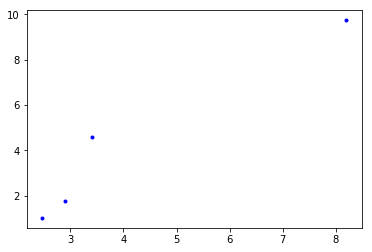

In [37]:
print a1inds[0:50]
print len(a1inds)
print len(a1projs[0])
print type(a1inds)
print a1inds[1]
#ai=alinds.split(" ")
#print ai()
vi=int(a1inds[0])
print p.projs[0][vi]
print a1projs[0][0]

plt.plot(a1projs[0],a1projs[3], ".b")


/home/feb23/.local/lib/python2.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


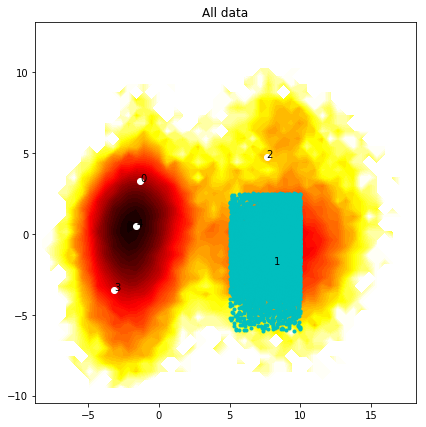

In [38]:
cl = [".g", ".r", ".c", ".m", ".y"]

plt.figure(figsize=(15,7))
plt.subplot(121)
z,x,y = np.histogram2d(p.projs[0],p.projs[3], bins=50)
F = -np.log(z)
extent = [x[0], x[-1], y[0], y[-1]]
plt.title('All data')
plt.contourf(F.T, 50, cmap=plt.cm.hot, extent=extent)
for i in range(5):
    x = pdbtraj.xyz[i] * 10.0 # convert from nanometres to angstroms
    proj = p.map(x)
    plt.plot(proj[0], proj[3], 'wo')
    plt.text( proj[0], proj[3], '{}'.format(i))

for i in range(len(a1projs)):
    #print i
    j=int(a1inds[i])
    plt.plot(p.projs[0][j],p.projs[3][j],'.c')

/home/feb23/.local/lib/python2.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


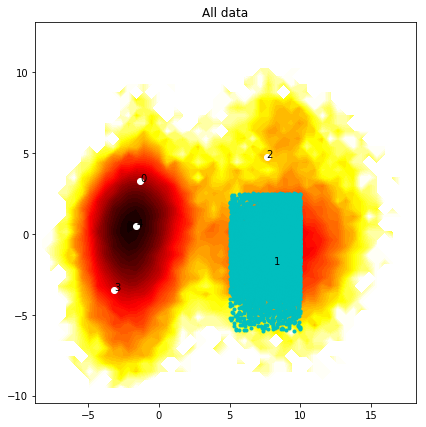

In [39]:
cl = [".g", ".r", ".c", ".m", ".y"]

plt.figure(figsize=(15,7))
plt.subplot(121)
z,x,y = np.histogram2d(p.projs[0],p.projs[3], bins=50)
F = -np.log(z)
extent = [x[0], x[-1], y[0], y[-1]]
plt.title('All data')
plt.contourf(F.T, 50, cmap=plt.cm.hot, extent=extent)
for i in range(5):
    x = pdbtraj.xyz[i] * 10.0 # convert from nanometres to angstroms
    proj = p.map(x)
    plt.plot(proj[0], proj[3], 'wo')
    plt.text( proj[0], proj[3], '{}'.format(i))

for i in range(len(a1projs)):
    #print i
    j=int(a1inds[i])
    plt.plot(p.projs[0][j],p.projs[3][j],'.c')

In [40]:
print a1inds[9234]

103124.0


0
645
103125


/home/feb23/.local/lib/python2.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in log


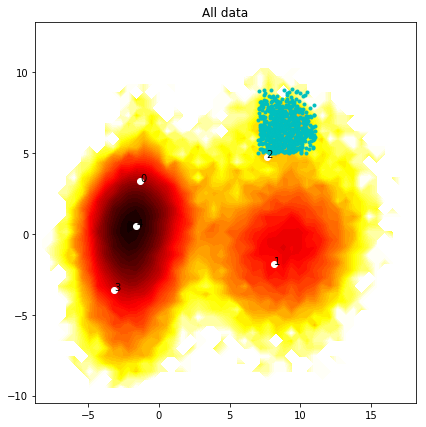

In [41]:
# sort and plot
# want to view average structure of area in range give below ( around pt 2)
a1x=[7.0,11.0]
a1y=[5.0,9.0]
a1projs=[]
print len(a1projs)
a1inds=np.zeros(1000000)
j=0
for i in range(len(p.projs[0])):
    if p.projs[0][i]>=a1x[0] and p.projs[0][i]<=a1x[1]:
        if p.projs[3][i]>=a1y[0] and p.projs[3][i]<=a1y[1]:
            a1projs.append([ p.projs[0][i],p.projs[1][i],p.projs[2][i],p.projs[4][i] ])
            #p_inds_in_a1=[p_inds_in_a1[:],i ]
            a1inds[j]=i
            j=j+1

print len(a1projs)
print len(p.projs[0])

cl = [".g", ".r", ".c", ".m", ".y"]

plt.figure(figsize=(15,7))
plt.subplot(121)
z,x,y = np.histogram2d(p.projs[0],p.projs[3], bins=50)
F = -np.log(z)
extent = [x[0], x[-1], y[0], y[-1]]
plt.title('All data')
plt.contourf(F.T, 50, cmap=plt.cm.hot, extent=extent)
for i in range(5):
    x = pdbtraj.xyz[i] * 10.0 # convert from nanometres to angstroms
    proj = p.map(x)
    plt.plot(proj[0], proj[3], 'wo')
    plt.text( proj[0], proj[3], '{}'.format(i))

for i in range(len(a1projs)):
    #print i
    j=int(a1inds[i])
    plt.plot(p.projs[0][j],p.projs[3][j],'.c')

In [42]:
print len(xtctraj)
print len(p.projs)

103125
28


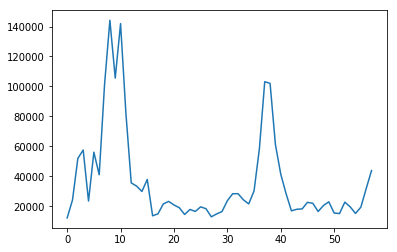

In [43]:
end=len(a1projs)-1
cl = ["g", "r", "c", "m", "y"]

rg=a1inds[0:end]



xtctraj.superpose(xtctraj[0])
mean_structure = xtctraj.xyz.mean(axis=0)

rmsf = 0 
diff = 0 
for i in range(end):
    j=int(a1inds[i])
    diff = diff + xtctraj[j].xyz - mean_structure
    rmsf = rmsf + np.sqrt((diff * diff).sum(axis=2).mean(axis=0))

plt.plot(rmsf)  
